In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.linear_model

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
vgsales = pd.read_csv('./vgsales.csv')

In [3]:
vgsales.shape

(16598, 11)

In [5]:
vgsales.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
vgsales.describe().T.style

,count,mean,std,min,25%,50%,75%,max
Rank,16598,8300.61,4791.85,1,4151.25,8300.5,12449.8,16600
Year,16327,2006.41,5.82898,1980,2003,2007,2010,2020
NA_Sales,16598,0.264667,0.816683,0,0,0.08,0.24,41.49
EU_Sales,16598,0.146652,0.505351,0,0,0.02,0.11,29.02
JP_Sales,16598,0.0777817,0.309291,0,0,0,0.04,10.22
Other_Sales,16598,0.048063,0.188588,0,0,0.01,0.04,10.57
Global_Sales,16598,0.537441,1.55503,0.01,0.06,0.17,0.47,82.74


In [8]:
vgsales.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [9]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [10]:
# checking the null values
vgsales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

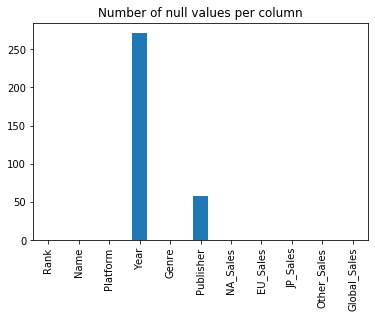

In [11]:
# plotting number of null values
vgsales.isnull().sum().plot(kind='bar'); 
plt.title('Number of null values per column');

In [12]:
# Dropping null values in the dataset
# I decide to drop null values because it will decrease the efficiency of the data cleaning and the visualizations bellow
vgsales.dropna(how='any', inplace=True)

In [13]:
vgsales.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [14]:
vgsales.shape

(16291, 11)

In [15]:
# Calculating the mean in every columns
vgsales.mean(axis=0)

Rank            8290.190228
Year            2006.405561
NA_Sales           0.265647
EU_Sales           0.147731
JP_Sales           0.078833
Other_Sales        0.048426
Global_Sales       0.540910
dtype: float64

In [16]:
# Calculating the median in Year column
vgsales['Year'].median()

2007.0

In [17]:
# Calculating the mode in year column
vgsales['Year'].mode()

0    2009.0
dtype: float64

In [18]:
# Calculating the max and min in Global Sales column
mx = vgsales['Global_Sales'].max()
mn = vgsales['Global_Sales'].min()
print(mx)
print(mn)

82.74
0.01


In [19]:
# For each EU Sales and JP Sales, calculate the minimum and maximum Global Sales.
EU = vgsales.groupby('EU_Sales').Global_Sales.agg(['min', 'max'])
JP = vgsales.groupby('JP_Sales').Global_Sales.agg(['min', 'max'])
print (EU,JP)

            min    max
EU_Sales              
0.00       0.01   5.95
0.01       0.01  11.66
0.02       0.02   2.50
0.03       0.03   2.15
0.04       0.04   4.07
...         ...    ...
9.27      21.40  21.40
11.00     24.76  24.76
11.01     33.00  33.00
12.88     35.82  35.82
29.02     82.74  82.74

[305 rows x 2 columns]             min    max
JP_Sales              
0.00       0.01  10.26
0.01       0.01   9.52
0.02       0.02   9.20
0.03       0.03   6.24
0.04       0.04  10.21
...         ...    ...
6.04      18.36  18.36
6.50      30.01  30.01
6.81      40.24  40.24
7.20      23.10  23.10
10.22     31.37  31.37

[244 rows x 2 columns]


In [77]:
# for reports in X360, calculating the most common game name
vgsales[vgsales.Platform == 'X360']['Name'].value_counts()[:5]

Need for Speed: Most Wanted                 2
Cloudy With a Chance of Meatballs           1
The Saboteur                                1
The Chronicles of Narnia: Prince Caspian    1
Dead or Alive 4                             1
Name: Name, dtype: int64

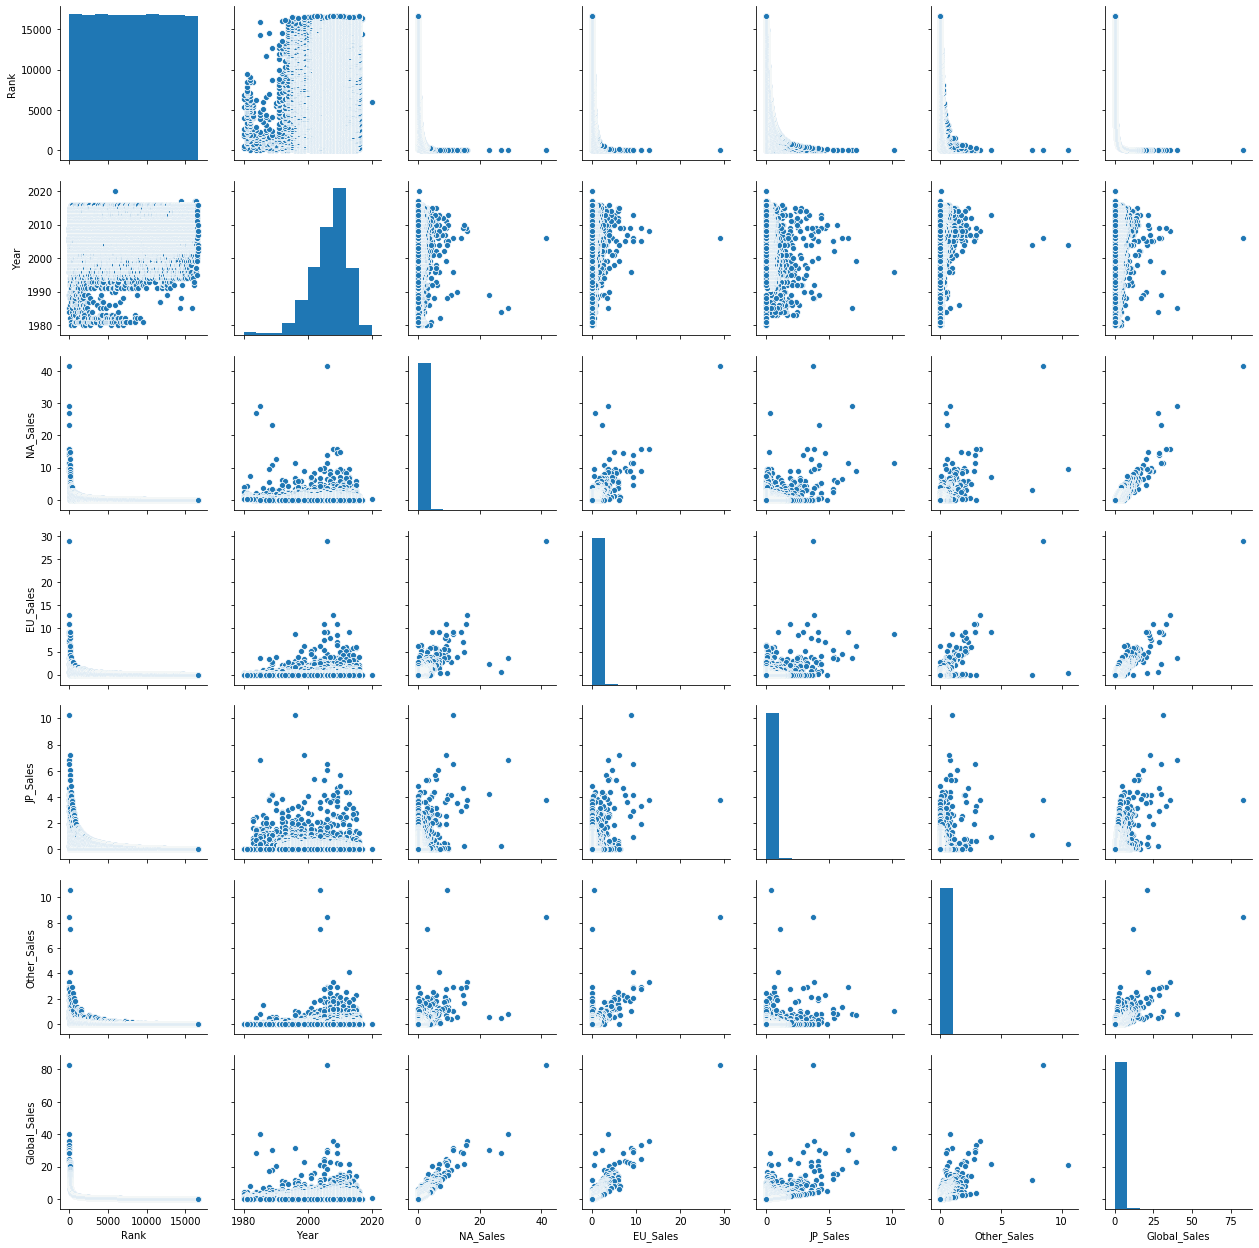

In [21]:
# plot relationship for every columns
sns.pairplot(vgsales);

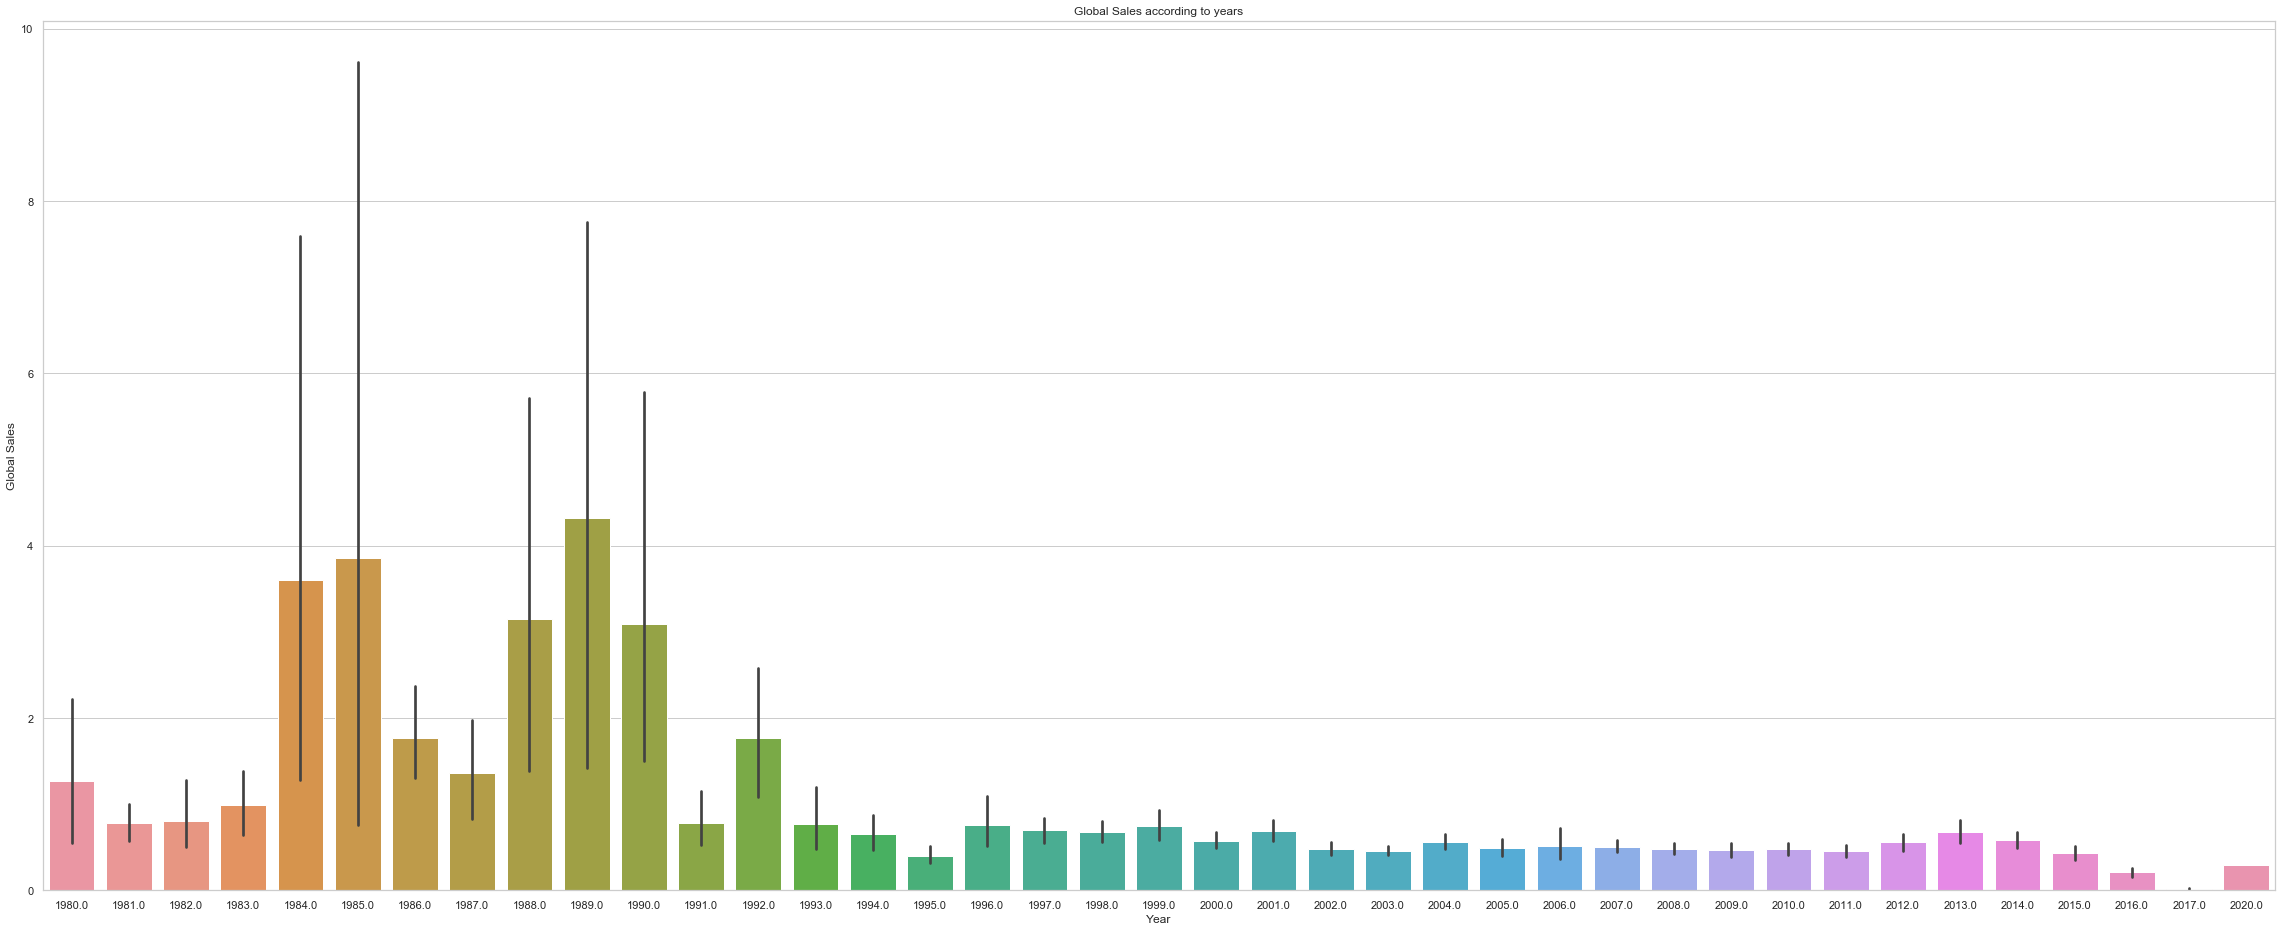

In [22]:
# Global Sales according to years
plt.figure(figsize=(40,16))
sns.set(style="whitegrid")
z=sns.barplot(y='Global_Sales',x='Year',data=vgsales)
z.set_title("Global Sales according to years")
z.set_ylabel("Global Sales")
z.set_xlabel("Year");

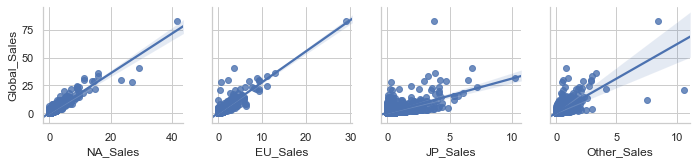

In [23]:
# Showing relationship between each of : NA_Sales, EU_Sales, JP_Sales, Other_Sales with Global_Sales
countries_col = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sns.pairplot(vgsales, x_vars=countries_col, y_vars='Global_Sales', kind='reg');

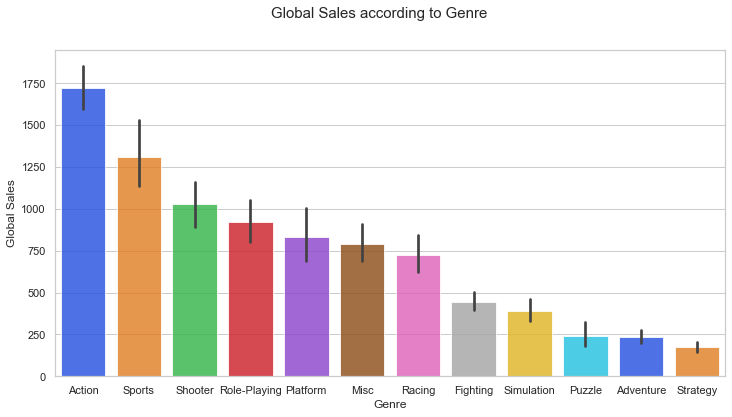

In [24]:
# Global Sales according to Genre
fig = plt.figure(figsize=(12,6))
fig.suptitle('Global Sales according to Genre', fontsize=15)
ax = sns.barplot(x='Genre',y='Global_Sales',data=vgsales,estimator=np.sum,order = vgsales.groupby('Genre')\
['Global_Sales'].sum().sort_values(ascending=False).reset_index()['Genre'].unique(),\
palette='bright',alpha=0.8)
ax.set_ylabel('Global Sales');

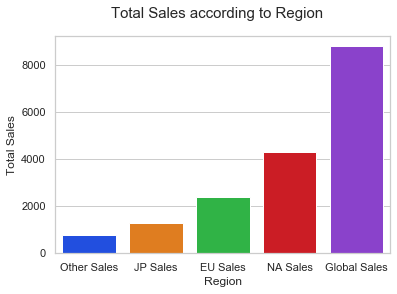

In [25]:
# Compare between each region with total sales
dic = [['NA Sales' , vgsales.NA_Sales.sum()], ['EU Sales', vgsales.EU_Sales.sum()],\
['JP Sales' , vgsales.JP_Sales.sum()],
['Other Sales' , vgsales.Other_Sales.sum()], ['Global Sales', vgsales.Global_Sales.sum()]]
vgsales_from_dic = pd.DataFrame(data=dic,index = [0,1,2,3,4],columns = ['Region','Total_Sales'])
fig = plt.figure()
fig.suptitle('Total Sales according to Region', fontsize=15)
axes = sns.barplot(x='Region',y='Total_Sales',data=vgsales_from_dic,palette="bright",order = vgsales_from_dic
.set_index('Region')['Total_Sales'].sort_values(ascending=True).reset_index()['Region'].unique())
axes.set_ylabel('Total Sales');

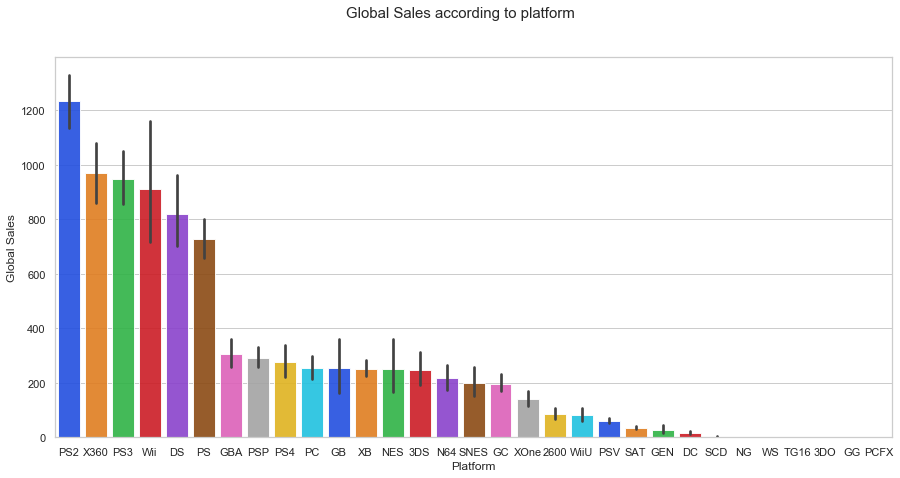

In [26]:
# Global Sales according to Platform
fig = plt.figure(figsize=(15,7))
fig.suptitle('Global Sales according to platform', fontsize=15)
ax = sns.barplot(x='Platform',y='Global_Sales',data=vgsales,estimator=np.sum,order = vgsales.groupby('Platform')
['Global_Sales'].sum().sort_values(ascending=False).reset_index()['Platform'].unique(),palette='bright',alpha=0.9)
ax.set_ylabel('Global Sales');

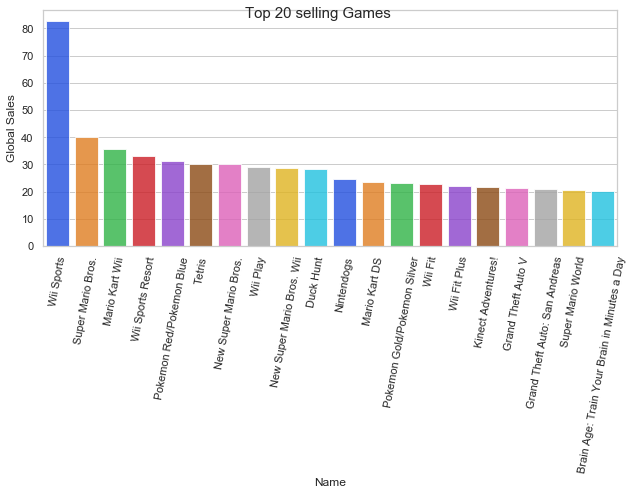

In [27]:
# Top 20 selling Games
vgsales[['Name','Global_Sales']].set_index('Name')
fig = plt.figure(figsize=(9,7))
fig.suptitle('Top 20 selling Games', fontsize=15)
ax = sns.barplot(x='Name',y='Global_Sales',data=vgsales.head(20),order = vgsales['Name'].head(20).unique(),
palette='bright',alpha=0.8)
ax.set_ylabel('Global Sales')
plt.xticks(rotation=79.5)
plt.tight_layout()

In [28]:
# Identify shortcomings:
# this dataset is quite huge, have alot of null values
# and having a lot of strings but fortunately our focusing will be on numerical values.

In [29]:
# Identify assumptions:
# regarding to the data above we can see that most global sales happened on year 1998, Action have the most global sales per genre
# the other sales made the least total sales, ps2 have the most global sales per platform and Wii sports
# have the most global sales per name. 

In [30]:
# Identify next steps:
# I'll identify the correlation, skew between columns and initiates sklearn using linear regression to predict global sales
# also I'll calculate the mean absolute error, mean squared error, root mean squared error, intercept, cofficient
# and I'll initiates sklearn on regression trees and plot the tree and calculates the score

In [31]:
# calculating the skew in every columns
vgsales.skew()

Rank             0.000266
Year            -1.003509
NA_Sales        18.740913
EU_Sales        18.774796
JP_Sales        11.124214
Other_Sales     24.102609
Global_Sales    17.304312
dtype: float64

In [32]:
# correlation between columns
vgsales.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178027,-0.400315,-0.379137,-0.269323,-0.332735,-0.426975
Year,0.178027,1.000000,-0.091285,0.006108,-0.169387,0.041128,-0.074647
NA_Sales,-0.400315,-0.091285,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,-0.379137,0.006108,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.269323,-0.169387,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,-0.332735,0.041128,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,-0.426975,-0.074647,0.941269,0.903264,0.612774,0.747964,1.000000


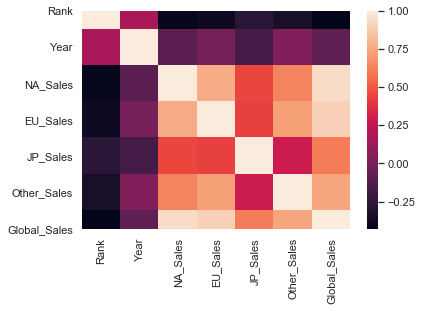

In [33]:
# view Correlation between columns
sns.heatmap(vgsales.corr());

In [34]:
# start the sklearn 
# since our target on the dataset is continuous I'll use linear regression to predict the global sales values
feature_cols = ['Year','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
X = vgsales[feature_cols]
y = vgsales.Global_Sales

In [35]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [37]:
# create object for linear regression 
lr = LinearRegression()

In [38]:
# fit that object
model = lr.fit(X_train, y_train)

In [39]:
# create object for predict
y_pred = lr.predict(X_test)

In [40]:
# print the predicts
print(y_pred)

[0.14028372 0.30026258 0.24027238 ... 0.10030471 0.05029492 0.3802376 ]


In [41]:
# print first 10 predicts
y_pred[0:10]

array([0.14028372, 0.30026258, 0.24027238, 0.10027985, 4.07994459,
       0.02026483, 0.14035109, 0.09029317, 0.02028976, 2.62998172])

In [42]:
# r squared , cofficient of determination
print(lr.score(X_test, y_test))

0.9999856981338687


In [43]:
# mean squared error
print(metrics.mean_squared_error(y_test, y_pred))

2.7350692554236063e-05


In [44]:
# to retrieve the intercept:
print(lr.intercept_)
#For retrieaving the slope:
print(lr.coef_)

0.007722618216334465
[-3.69842670e-06  9.99911771e-01  1.00003987e+00  1.00004883e+00
  9.99531518e-01]


In [45]:
# print Mean Absolute Error, Mean Squared Error, Root Meaan Squared Error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.002919589484790544
Mean Squared Error: 2.7350692554236063e-05
Root Mean Squared Error: 0.005229788958862113


In [46]:
# test the model on the testing set and check the accuracy.
print(metrics.mean_squared_error(y_train, lr.predict(X_train)))
print(metrics.mean_squared_error(y_test, y_pred))

2.725825124026628e-05
2.7350692554236063e-05


In [47]:
# compare between acual and prediction
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)

In [48]:
df1.head(10)

,Actual,Predicted
9172,0.14,0.140284
5906,0.30,0.300263
7003,0.23,0.240272
10503,0.10,0.100280
289,4.08,4.079945
14913,0.02,0.020265
9257,0.14,0.140351
11004,0.09,0.090293
15669,0.02,0.020290
577,2.63,2.629982


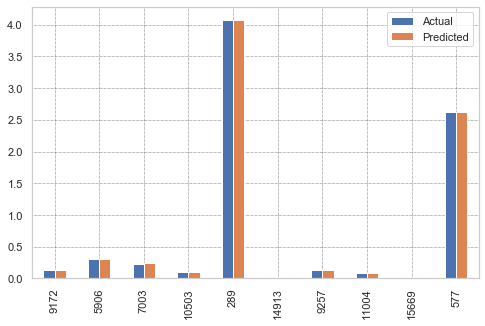

In [49]:
# plot the acual and prediction
df1.plot(kind='bar',figsize=(8,5))
plt.grid(linestyle=':', linewidth='0.5', color='green')
plt.grid(linestyle=':', linewidth='0.5', color='black')
plt.show()

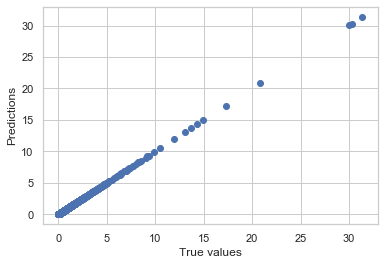

In [50]:
# relationship between true values and prediction values
plt.scatter(y_test,y_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

In [51]:
# print the score of the test model
print ('Score:', model.score(X_test, y_test))

Score: 0.9999856981338687


In [52]:
# test four different linear models: OLS, Theil-Sen, RANSAC, and Huber.
ols = sklearn.linear_model.LinearRegression()
ts = sklearn.linear_model.TheilSenRegressor()
ransac = sklearn.linear_model.RANSACRegressor()
huber = sklearn.linear_model.HuberRegressor()

In [53]:
# print the linear models scores
def score(model):
    return sklearn.metrics.median_absolute_error(y_test, y_pred)

print("OLS:",score(ols).round(2))
print("Theil-Sen:", score(ts).round(2))
print("RANSAC:", score(ransac).round(2))
print("Huber:", score(huber).round(2))

OLS: 0.0
Theil-Sen: 0.0
RANSAC: 0.0
Huber: 0.0


In [54]:
# start sklearn on regression trees
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree, export_text

In [55]:
# instatiate a decision tree Regressor and set the criterion
regressor = DecisionTreeRegressor(criterion='mse', max_depth=12)

regressor.fit(X_train, y_train)

y_preds = regressor.predict(X_test)

In [56]:
# compare between acual and prediction
dtr_performance = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds})
dtr_performance.head(10)

,Actual,Predicted
9172,0.14,0.147243
5906,0.30,0.307213
7003,0.23,0.219084
10503,0.10,0.100789
289,4.08,4.377500
14913,0.02,0.025386
9257,0.14,0.140074
11004,0.09,0.080970
15669,0.02,0.025386
577,2.63,2.463333


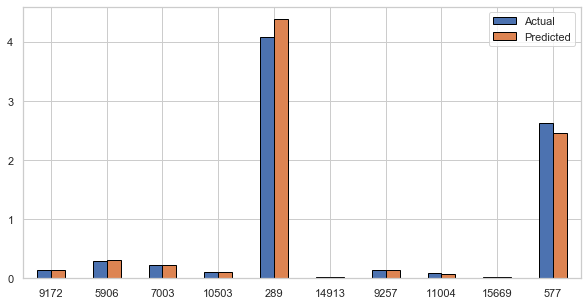

In [57]:
# plot the acual and prediction
dtr_performance.head(10).plot(kind='bar',figsize=(10,5), edgecolor='#000000')
plt.xticks(rotation=0);

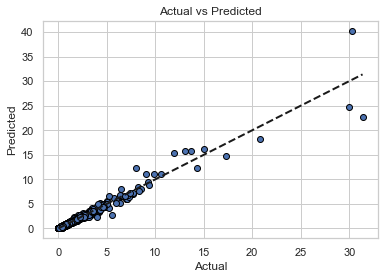

In [58]:
# relationship between true values and prediction values
fig, ax = plt.subplots()
ax.scatter(y_test, y_preds, edgecolor='#000000')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs Predicted');

In [59]:
# print Mean Absolute Error, Mean Squared Error, Root Meaan Squared Error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_preds))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_preds)))

Mean Absolute Error: 0.05144858260444154
Mean Squared Error: 0.07853098601265943
Root Mean Squared Error: 0.2802338059775434


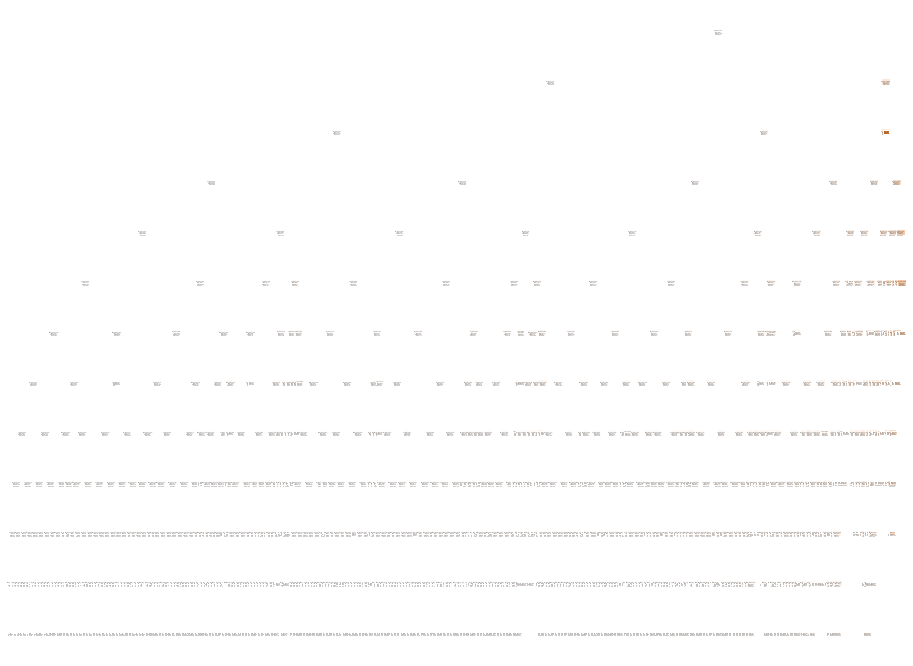

In [60]:
# plot the tree regressor for the model
plt.figure(figsize=(16,12))
plot_tree(regressor, feature_names=X.columns, filled=True);

In [61]:
# export text for the model
print(export_text(regressor, feature_names=list(X.columns),
                  show_weights=True))

|--- NA_Sales <= 4.22
|   |--- NA_Sales <= 0.87
|   |   |--- EU_Sales <= 0.18
|   |   |   |--- JP_Sales <= 0.63
|   |   |   |   |--- NA_Sales <= 0.18
|   |   |   |   |   |--- JP_Sales <= 0.20
|   |   |   |   |   |   |--- Other_Sales <= 0.01
|   |   |   |   |   |   |   |--- NA_Sales <= 0.07
|   |   |   |   |   |   |   |   |--- JP_Sales <= 0.10
|   |   |   |   |   |   |   |   |   |--- NA_Sales <= 0.03
|   |   |   |   |   |   |   |   |   |   |--- JP_Sales <= 0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- JP_Sales >  0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- NA_Sales >  0.03
|   |   |   |   |   |   |   |   |   |   |--- EU_Sales <= 0.03
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- EU_Sales >  0.03
|   |   |   |   |   |   |   |   |   |   |   |--- truncated b

In [62]:
# create feature importances object
feature_importances = regressor.feature_importances_

In [63]:
# print the features and the importance score in this particular combination.
features_df = pd.DataFrame({'Features': X.columns, 
                            'Importance Score': regressor.feature_importances_})

features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df
features_df[features_df['Importance Score'] > 0]

,Features,Importance Score
1,NA_Sales,0.892926
2,EU_Sales,0.079607
3,JP_Sales,0.022042
4,Other_Sales,0.005204
0,Year,0.000222


In [64]:
# additional part
# Cluster
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [65]:
km.labels_

array([3, 2, 3, ..., 3, 3, 1], dtype=int32)

In [66]:
vgsales['cluster'] = km.labels_
vgsales.sort_values('cluster')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,cluster
6251,6253,NBA 2K12,PSP,2011.0,Sports,Take-Two Interactive,0.22,0.03,0.00,0.03,0.28,0
2903,2905,NHL 12,X360,2011.0,Sports,Electronic Arts,0.55,0.10,0.00,0.05,0.70,0
14742,14745,Jewel Quest 5: The Sleepless Star,DS,2012.0,Action,Licensed 4U,0.00,0.02,0.00,0.00,0.03,0
7271,7273,Spirit Camera: The Cursed Memoir,3DS,2012.0,Adventure,Nintendo,0.12,0.02,0.06,0.01,0.22,0
9429,9431,SpongeBob's Surf & Skate Roadtrip,DS,2011.0,Action,THQ,0.11,0.02,0.00,0.01,0.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8295,8297,Finding Nemo: Escape to the Big Blue,DS,2006.0,Action,THQ,0.12,0.04,0.00,0.01,0.17,3
8296,8298,Backyard Baseball '10,PS2,2009.0,Sports,Atari,0.08,0.07,0.00,0.02,0.17,3
8298,8300,The Lord of the Rings: Aragorn's Quest,PS3,2010.0,Action,Warner Bros. Interactive Entertainment,0.10,0.04,0.00,0.02,0.17,3
8286,8288,Despicable Me: The Game,PSP,2010.0,Platform,D3Publisher,0.05,0.08,0.00,0.04,0.17,3


In [67]:
km.cluster_centers_

array([[2.01298091e+03, 2.08516895e-01, 1.70742842e-01, 6.17152437e-02,
        5.41217436e-02],
       [2.00264608e+03, 2.84008534e-01, 1.46269930e-01, 6.89108466e-02,
        4.16595554e-02],
       [1.99444682e+03, 4.19138142e-01, 1.53667482e-01, 2.58239609e-01,
        2.72004890e-02],
       [2.00811510e+03, 2.48036364e-01, 1.33119368e-01, 4.99067194e-02,
        5.51889328e-02]])

In [70]:
centers = vgsales.groupby('cluster').mean()

In [71]:
colors = np.array(['red', 'green', 'blue', 'yellow'])

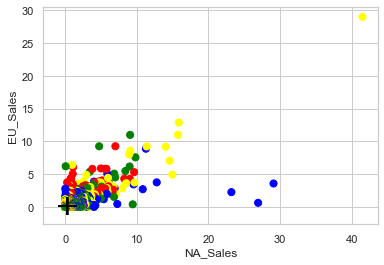

In [72]:
plt.scatter(vgsales.NA_Sales, vgsales.EU_Sales, c=colors[vgsales.cluster], s=50);

# Cluster centers, marked by "+"
plt.scatter(centers.NA_Sales, centers.EU_Sales, linewidths=3, 
            marker='+', s=300, c='black');

# Add labels.
plt.xlabel('NA_Sales')
plt.ylabel('EU_Sales');

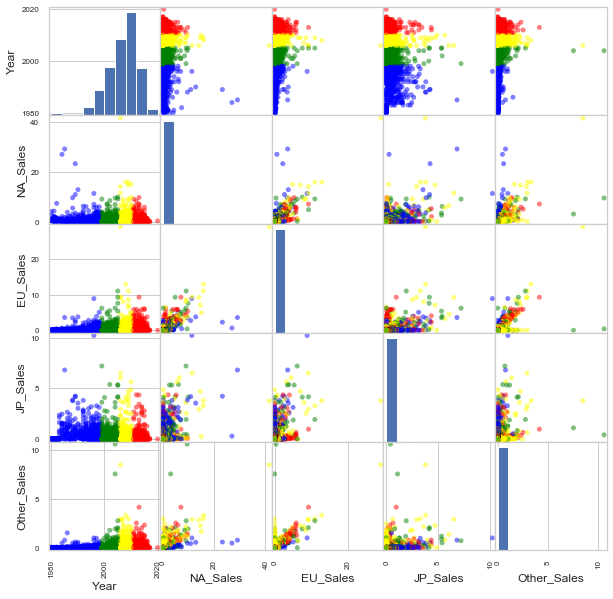

In [73]:
pd.plotting.scatter_matrix(X, c=colors[vgsales.cluster], figsize=(10,10), s=100);